In [ ]:
# import import_ipynb
# %run data_analysis_function.ipynb

In [1]:
import numpy as np
a = np.zeros((156816, 36, 53806), dtype='uint8')

In [ ]:
# import data_analysis_function

In [ ]:
# from ipynb.fs.full.data_analysis_function import create_dataframe
# from ipynb.fs.full.data_analysis_function import conversion_timestamp_to_unixtime

In [ ]:
# from ipynb.fs.full.data_analysis_function import remove_rw_column

In [2]:
import json
import collections
import os
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn import linear_model
from sklearn import tree

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from dataset_analysis import create_dataframe
from dataset_analysis import conversion_timestamp_to_unixtime
from dataset_analysis import remove_rw_column
from dataset_analysis import alter_time
from dataset_analysis import rearrange_frame
from dataset_analysis import drop_zero_value_row_of_blast_furnace_signal
from dataset_analysis import drop_zero_value_row_of_target_signal

from dataset_analysis import check_A_B_blast_furnace
from dataset_analysis import no_zero_value_in_target

from dataset_analysis import drop_column_with_same_value
from dataset_analysis import drop_nan_value
from dataset_analysis import drop_row
from dataset_analysis import drop_string_column
from dataset_analysis import feature_selection_with_selectKbest
from dataset_analysis import pearson_correlation
from dataset_analysis import make_dataframe_with_high_correlated_value
from dataset_analysis import dataframe_date_time_type
from dataset_analysis import my_sum
from dataset_analysis import draw_graph
from dataset_analysis import draw_feature_vs_target

In [3]:
from model_file import make_dataset
from model_file import scikit_learn_model
from model_file import plot_graph
from model_file import evaluation_metrices

In [4]:
with open('variable_config.json', 'r') as f:
    config = json.load(f)

filepath = config['DEFAULT']['file_path']
filepath_ubuntu = config['DEFAULT']['file_path_ubuntu']
filepath_server = config['DEFAULT']['file_path_server']
start_pos = config['DEFAULT']['start_point_dataframe']
end_pos = config['DEFAULT']['end_point_dataframe']
date_column = config['DEFAULT']['date_column']
target_column = config['DEFAULT']['target_column']
req_drop_value_target = config['DEFAULT']['req_drop_value_target']
furnace_signal_column_a = config['DEFAULT']['blast_furnace_signal_a']
furnace_signal_column_b = config['DEFAULT']['blast_furnace_signal_b']
value_A = config['DEFAULT']['req_value_of_blast_furnace_A']
value_B = config['DEFAULT']['req_value_of_blast_furnace_B']
max_best_number = config['DEFAULT']['max_best_number']
correlation_threshold_min_value = config['DEFAULT']['correlation_threshold_min_value']
correlation_threshold_max_value = config['DEFAULT']['correlation_threshold_max_value']
subfolder_feature_vs_target = config['DEFAULT']['subfolder_feature_vs_target']
evaluation_metrics_file_name = config['DEFAULT']['evaluation_metrics_file']
# print(type(correlation_threshold_min_value))
print(req_drop_value_target)

0


In [5]:
initial_dataframe = create_dataframe(filepath_server)

In [6]:
initial_dataframe.head()

,longTime,AEAGHOAWE2T1,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,...,RWWIHOUT10V1,RWWIHOT7_RV0,RWWIHOT8_RV0,RWWIHOT9_RV0,RWWIHOT10RV0,RWWIHOTSURV0,RWWIHOTSUMV0,RWWIHO_VERV0,RWWIHO_UESV0,RWWIHOSUMAV0
0,1565853000000,59.919107,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,...,0,71.894489,50.087283,40.250768,73.763059,71.201763,49.606024,38.096640,0.671974,33.111827
1,1565852940000,59.919107,100.0,91.029023,99.969567,55.766858,89.885921,90.963652,99.089689,56.910569,...,0,71.902377,50.110508,40.379436,73.763059,71.276868,49.615189,38.034993,0.672205,33.060837
2,1565852880000,59.919107,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,...,0,71.944404,50.107863,40.662733,73.763059,71.434676,49.749139,37.951489,0.682817,33.066594
3,1565852820000,59.919107,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,...,0,71.943151,50.062481,40.229931,73.763059,71.210012,49.954175,37.911700,0.665143,34.003952
4,1565852760000,60.380468,100.0,91.029023,99.969567,55.766858,90.046727,90.963652,99.089689,56.910569,...,0,71.966247,50.058978,39.999024,73.763059,71.112367,49.849248,37.978844,0.664477,33.928494


In [10]:
# initial_dataframe.loc[:, initial_dataframe.dtypes == object]
# initial_dataframe.dtypes == object

In [9]:
u = initial_dataframe.columns.get_loc("DEWIHOAT9_I0")
v = initial_dataframe.columns.get_loc("DEWIHOBT9_I0")
w = initial_dataframe.columns.get_loc("DEWIHOAT8_I0")
x = initial_dataframe.columns.get_loc("DEWIHOBT8_I0")
print(u,v,w,x)

4100 4101 4098 4099


# plotted blast furnace A and B for Turbine 8's output

In [7]:
# print(initial_dataframe.shape)
# plt.plot(initial_dataframe["AEWIHO_T8AV2"], color = 'blue')
# plt.plot(initial_dataframe["DEWIHOBT8_I0"], color = 'red')
# plt.plot(initial_dataframe["DEWIHOAT8_I0"], color = 'black')
# plt.legend(["AEWIHO_T8AV2", "DEWIHOBT8_I0","DEWIHOAT8_I0"], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (20, 10)

# plotted blast furnace A and B for Turbine 9's output

(186100, 4239)


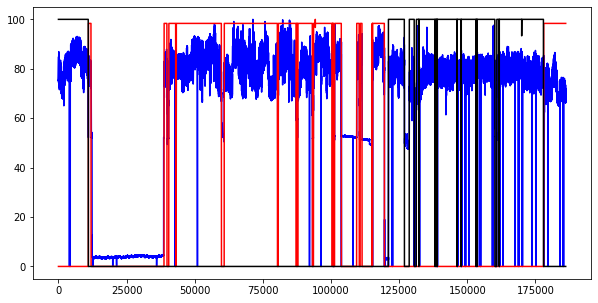

In [9]:
print(initial_dataframe.shape)
plt.plot(initial_dataframe[target_column], color = 'blue')
plt.plot(initial_dataframe[furnace_signal_column_a], color = 'red')
plt.plot(initial_dataframe[furnace_signal_column_b], color = 'black')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (10, 5)

In [7]:
test_new = conversion_timestamp_to_unixtime(initial_dataframe)

/home/atif/machine_learning_stuff/Time-Series-Forecasting-of-a-Power-Plant/notebook_file_data_prediction/dataset_analysis.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  longTime = longTime.as_matrix()


In [10]:
test_new.shape

(186100, 4239)

In [11]:
# test_new_1 = test_new.drop(['row ID'], axis = 1) # need it if dataset made fro KNIME using ROW_ID

test_new_1 = test_new

var_new = remove_rw_column(test_new_1)

test_new_2 = test_new_1.iloc[:][var_new]

# Taking define number of row from the beginning
multivariate_data = alter_time(test_new_2, start_pos, test_new.shape[0])

In [12]:
index_array=[0,-1]
req_column_name = [date_column, target_column]
# req_column_name = [date_column, furnace_signal_column]
rearranged_dataframe = rearrange_frame(multivariate_data,req_column_name,index_array)

In [15]:
print(type(multivariate_data), multivariate_data.shape)
print(type(rearranged_dataframe), rearranged_dataframe.shape)

<class 'pandas.core.frame.DataFrame'> (186100, 3983)
<class 'pandas.core.frame.DataFrame'> (186100, 3983)


In [16]:
# increase_1=0
# count_array_2 = []
# for i,v in enumerate(rearranged_dataframe[furnace_signal_column_a]):
    
#     if v < 98 and rearranged_dataframe.iloc[i][furnace_signal_column_b] <100:
        
# #         print("i: ",i," ,blast A: ",v," ,blast B: ",rearranged_dataframe.iloc[i][furnace_signal_column_b])
#         count_array_2 = np.append(count_array_2, i)
#         increase_1+=1

In [16]:
dataframe_no_zero_value_blast_furnace = check_A_B_blast_furnace(rearranged_dataframe, furnace_signal_column_a, value_A,
                                                               furnace_signal_column_b, value_B)

In [17]:
print(type(dataframe_no_zero_value_blast_furnace),dataframe_no_zero_value_blast_furnace.shape)

<class 'pandas.core.frame.DataFrame'> (141456, 3983)


In [22]:
s = dataframe_no_zero_value_blast_furnace.iloc[0:1000,:]
print(type(s), s.shape)

<class 'pandas.core.frame.DataFrame'> (1000, 3983)


In [23]:
w = s.corr()

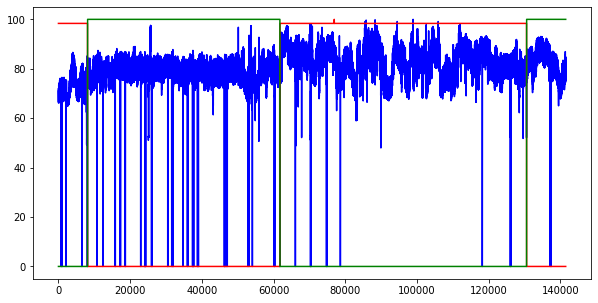

In [19]:
plt.plot(dataframe_no_zero_value_blast_furnace[target_column], color = 'blue')
plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_a], color = 'red')
plt.plot(dataframe_no_zero_value_blast_furnace[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (10, 5)

In [20]:
dataframe_no_zero_value_target_column = no_zero_value_in_target(dataframe_no_zero_value_blast_furnace,target_column, req_drop_value_target)

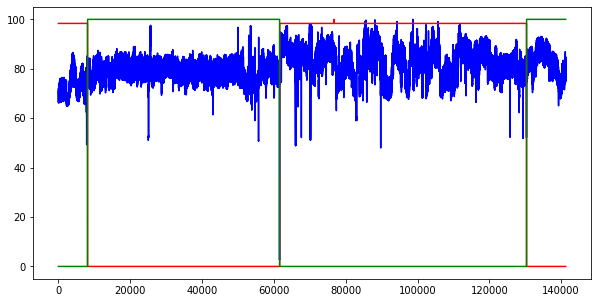

In [21]:
plt.plot(dataframe_no_zero_value_target_column[target_column], color = 'blue')
plt.plot(dataframe_no_zero_value_target_column[furnace_signal_column_a], color = 'red')
plt.plot(dataframe_no_zero_value_target_column[furnace_signal_column_b], color = 'green')
# plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# plt.xlim(0,initial_dataframe.shape[0]+10)
# plt.xticks(np.arange(0,initial_dataframe.shape[0],))
plt.rcParams['figure.figsize'] = (10, 5)

In [22]:
print(rearranged_dataframe.shape)
print(dataframe_no_zero_value_blast_furnace.shape)
print(dataframe_no_zero_value_target_column.shape)

(186100, 3983)
(141456, 3983)
(141269, 3983)


In [46]:
# drop_object = dataframe_no_zero_value_target_column.select_dtypes(exclude=['object'])

In [47]:
# Drop the column which has sam evalue in every ROW
# dataframe_drop_column_with_same_value = drop_column_with_same_value(dataframe_no_zero_value_target_column)

In [22]:

# Drop the ROW which has NAN value
multivariate_data_drop_nan = drop_nan_value(dataframe_no_zero_value_target_column)


In [23]:
multivariate_data_drop_nan.shape

(141269, 3983)

In [26]:
# Drop the row who has consecutive same value
# dataframe_drop_row_consecutive_same_value = drop_row(multivariate_data_drop_nan)

In [50]:
# dataframe_drop_row_consecutive_same_value= multivariate_data_drop_nan

In [23]:
nunique = dataframe_no_zero_value_target_column.apply(pd.Series.nunique)
cols_to_drop = nunique[nunique == 1].index
new_frame = dataframe_no_zero_value_target_column.drop(cols_to_drop, axis=1)

In [24]:
print(type(dataframe_no_zero_value_target_column))
print(type(new_frame))
print(new_frame.shape)
new_frame.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(141269, 2921)


,dateTime,AEAGHOAWE2A0,AEAGHOAWE2T0,AEAGHOAWE1A0,AEAGHOAWE1T1,AEAGHOAWE1T0,AEAGHOAWE3T0,AEAGHOAWE3A0,AEAGHOAWE3T1,AEAGHOAWE_A2,...,AEWIHOC_MWT0,AEWIHOCM__P0,AEWIHOC___P0,AEWIHOCKZ_V0,AEWIHOCK__V9,AEWIHOCWF_A2,AEWIHOC___T0,AEWIHOCWF_A1,AEWIHOAKVSV0,AEWIHO_T9AV2
0,2019-02-11 21:57:00,28.0198,90.9881,25.369,92.3875,90.2083,93.6744,10.9712,51.9164,100,...,76.2732,94.8227,56.6627,0,59.0767,63.4936,45.5897,30.3542,72.5928,66.3871
1,2019-02-11 21:58:00,37.8704,90.9881,34.4516,88.1778,90.4495,93.3531,18.8973,51.4518,75.6018,...,76.3286,94.8065,56.6627,0,59.1864,63.4936,45.5897,30.3339,72.1086,66.7652
2,2019-02-11 21:59:00,37.5393,91.1494,28.2881,83.2178,90.6111,93.6948,21.6692,51.4518,88.1312,...,76.3855,94.8044,56.6627,0,59.3488,63.4936,45.5897,30.8965,71.9806,66.7674
3,2019-02-11 22:00:00,33.6546,91.1494,19.4841,78.5467,90.5906,93.3531,20.4553,50.9872,91.1575,...,76.3784,94.866,56.943,0,58.5514,63.4936,45.5897,30.9981,72.105,66.8595
4,2019-02-11 22:01:00,31.0041,91.1494,13.6516,74.452,90.9934,93.3735,16.2266,50.9872,100,...,76.4339,94.8579,56.943,0,58.9216,63.4936,45.5897,30.7704,72.0846,66.87


In [51]:
# Drop the column who has 'objet' type value
# dataframe_no_string = drop_string_column(dataframe_drop_row_consecutive_same_value)

# drop column who has always same value

In [57]:
# new_frame = multivariate_data_drop_nan.drop(multivariate_data_drop_nan.std()[(multivariate_data_drop_nan.std() == 0)].index, axis=1)

In [59]:
# cols = multivariate_data_drop_nan.select_dtypes([np.number]).columns
# diff = multivariate_data_drop_nan[cols].diff().sum()
# no_same_value_column = multivariate_data_drop_nan.drop(diff[diff == 0].index, axis=1)

In [53]:
print(dataframe_drop_column_with_same_value.shape)
print(multivariate_data_drop_nan.shape)
print(dataframe_drop_row_consecutive_same_value.shape)
print(dataframe_no_string.shape)
print(new_frame.shape)

(141269, 3983)
(141269, 3983)
(141269, 3983)
(141269, 1)
(141269, 1)


In [44]:
# update_1 = multivariate_data_drop_nan.iloc[0:25000,:]

In [45]:
# update_1.shape

In [47]:
# plt.plot(update_1[target_column], color = 'blue')
# plt.plot(update_1[furnace_signal_column_a], color = 'red')
# plt.plot(update_1[furnace_signal_column_b], color = 'green')
# # plt.legend([target_column, furnace_signal_column_a, furnace_signal_column_b], loc='upper left')
# # plt.xlim(0,initial_dataframe.shape[0]+10)
# # plt.xticks(np.arange(0,initial_dataframe.shape[0],))
# plt.rcParams['figure.figsize'] = (10, 5)

In [25]:
# Make dataframe with dateTime index
dataframe_datetime = new_frame.set_index('dateTime')

In [25]:
# Feature selection with Sklearn feature best technique
sklearn_feature_best_dataframe = feature_selection_with_selectKbest(dataframe_datetime,max_best_number)

In [26]:
sklearn_feature_best_dataframe.head()

,DEWASGGP_SG4,DEO2GBHS19I2,DEWIHOBT10I0,DEO2GBHRV2I1,DEO2GBHSS2I3,AEKDWAT1__V0,DEDASGGHSAG1,DEKDHO_T8_A0,DEHGHOA_OSI0,AEWIGHG7_AG0,...,DEHGF_C_ZGI1,DEKGTWW6RSI0,AEWIHO_T7AV2,DEHGK1_R_HI0,DEHGK2_R_HI0,AEWIGHG10AG2,DEWIHOAT10I0,DEDLTSB2_FI0,DEDLV5___SI0,AEWIHO_T9AV2
dateTime,,,,,,,,,,,,,,,,,,,,,
2019-02-11 21:57:00,0,0,100,0,0,69.9311,100,100,0,99.9901,...,100,100,96.9916,0,0,92.6118,0,0,0,66.3871
2019-02-11 21:58:00,0,0,100,0,0,62.7577,100,100,0,99.9901,...,100,100,97.0196,0,0,92.4882,0,0,0,66.7652
2019-02-11 21:59:00,0,0,100,0,0,62.2725,100,100,0,99.9751,...,100,100,97.0106,0,0,92.55,0,0,0,66.7674
2019-02-11 22:00:00,0,0,100,0,0,62.204,100,100,0,99.9861,...,100,100,96.8599,0,0,92.4264,0,0,0,66.8595
2019-02-11 22:01:00,0,0,100,0,0,62.0337,100,100,0,99.9861,...,100,100,97.1297,0,0,92.55,0,0,0,66.87


In [30]:
# feature selection with Pearson Correlation.

sklearn_correlation, main_correlation = pearson_correlation(sklearn_feature_best_dataframe, dataframe_datetime)

In [27]:
q = dataframe_no_zero_value_target_column.corr()

In [29]:
q

""


In [ ]:
# make a dataframe with signal who is lies between a given range of correlation threshold value
main_frame = dataframe_datetime
correlated_frame = main_correlation

# main_frame = sklearn_feature_best_dataframe
# correlated_frame = sklearn_correlation

dataframe_high_correlation = make_dataframe_with_high_correlated_value(main_frame,correlated_frame,
                                                             correlation_threshold_min_value, correlation_threshold_max_value)

In [ ]:
dataframe_high_correlation.shape

In [ ]:
dataframe_datetime.tail()

In [ ]:
current_directory = os.getcwd()
print('current_directory is: ',current_directory)
address = 'image_folder'
final_directory = current_directory+'/'+str(address)
if not os.path.exists(final_directory):
    os.makedirs(final_directory)
    print('created : ', final_directory)
else:
    print(final_directory,' has already created')
    pass

In [ ]:
print(len(dataframe_high_correlation.columns))
subfolder_1 = 'feature_vs_target'
draw_feature_vs_target = draw_feature_vs_target(dataframe_high_correlation,final_directory,subfolder_1)

In [ ]:
train_input, train_output, test_input, test_output = make_dataset(dataframe_high_correlation[0:5000])

#s_array = dataframe_high_correlation.values
model_list = [LinearRegression(),linear_model.Lasso(alpha=0.1),linear_model.Ridge(alpha=.5),
              linear_model.BayesianRidge(), tree.DecisionTreeRegressor(max_depth=2),ExtraTreesRegressor(),
              BaggingRegressor(ExtraTreesRegressor()),GBR()]
name = ['LinearRegression','Lasso','Ridge','BayesianRidge','tree','ExtraTreesRegressor','BaggingRegressor','GBR']

In [ ]:
evaluation_metrics_file_path = final_directory+'/'+evaluation_metrics_file_name
if not os.path.isfile(evaluation_metrics_file_path):
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file now created')
else:
    os.remove(evaluation_metrics_file_path)
    f = open(evaluation_metrics_file_path,'a')
    f.close()
    print('metrics file removed and created')

In [ ]:
model = scikit_learn_model(model_list, name, train_input, train_output, test_input, test_output, final_directory, evaluation_metrics_file_path)

In [ ]:
temp_frame = rearranged_dataframe.copy()
temp_frame_1 = temp_frame.set_index('dateTime')

In [ ]:
# df = dataframe_date_time_type(dataframe_datetime)
df = dataframe_date_time_type(temp_frame_1)

dict_of_dates = {k: v for k, v in df.groupby('Date')}
dict_of_day_type = {k:v for k,v in df.groupby('TypeofDAY')}
dict_of_day_name = {k:v for k,v in df.groupby('day_name')}


date_key_value = collections.OrderedDict(dict_of_dates)
day_type_key_value = collections.OrderedDict(dict_of_day_type)
day_name_key_value = collections.OrderedDict(dict_of_day_name)

draw_graph_date = draw_graph(date_key_value,dict_of_dates, furnace_signal_column,final_directory, subfolder_name = 'date_fig_blast_furnace')
draw_graph_week = draw_graph(day_type_key_value,dict_of_day_type, furnace_signal_column,final_directory, subfolder_name = 'week_fig_blast_furnace')
draw_graph_day = draw_graph(day_name_key_value,dict_of_day_name, furnace_signal_column,final_directory, subfolder_name = 'day_fig_blast_furnace')

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

In [ ]:
lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs= 30

# define model
def NN_model():
    NN_model = Sequential()
    NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_input.shape[1], activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
#     NN_model.add(Dense(1, kernel_initializer='normal',activation='relu'))
    NN_model.add(Dense(1))
    return NN_model
NN_model=NN_model()
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error','accuracy'])
NN_model.summary()

In [ ]:
NN_model.fit(train_input, train_output, epochs=epochs, batch_size=batch_size)

In [ ]:
predicted_output = NN_model.predict(test_input)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math
print('r_2 statistic: %.2f' % r2_score(test_output,predicted_output))
print("Mean_absolute_error: %.2f" % mean_absolute_error(test_output,predicted_output))
print("Mean squared error: %.2f" % mean_squared_error(test_output,predicted_output))
RMSE=math.sqrt(mean_squared_error(test_output,predicted_output))
print('RMSE: ',RMSE)

In [ ]:
plt.plot((min(test_output), max(test_output)), (min(predicted_output), max(predicted_output)), color='red')
plt.scatter(test_output, predicted_output, color='blue')

In [ ]:
dataframe_datetime.iloc[0:5000].plot(y = dataframe_datetime.columns[-1], use_index=True)
plt.rcParams['figure.figsize'] =(15,5)